Wiktoria Jarosz
----
20468082
----

Part 1
------
1.1
---

In [2]:
import random
import matplotlib.pyplot as plt

In [3]:
def generate_random_bit_string(length):
    #create random string of ones and zeros
    return ''.join(random.choice('01') for i in range(length))

def initialize_pop(pop_size, bit_string_length):
    #create random bit string of specified length a specified amount of times
    return [generate_random_bit_string(bit_string_length) for i in range(pop_size)]

def fitness(bit_string):
    #count how many ones
    fitness = bit_string.count('1')
    return fitness

def select_parents(pop):
    #return the two parents with the highest fitness
    sorted_parents = sorted(pop, key=fitness, reverse=True)
    return sorted_parents[0], sorted_parents[1]

def crossover(parent1, parent2):
    #random crossover point
    crossover_point = random.randint(0, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return ''.join(child1), ''.join(child2)  #convert back to strings

def mutate(bit_string, mutation_rate):
    mutated_bit_string = list(bit_string)  #convert the string to a list

    for i in range(len(mutated_bit_string)):
        if random.random() < mutation_rate:
            #flip the bit at a random position
            mutated_bit_string[i] = '1' if mutated_bit_string[i] == '0' else '0'
            break  #stop mutating after changing one bit

    return ''.join(mutated_bit_string)  #convert the list back to a string

In [4]:
#example
pop_size = 10
bit_string_length = 30
generations = 200
mutation_rate = 0.01

In [5]:
#create pop
pop = initialize_pop(pop_size, bit_string_length)

average_fitness_list = []

for generation in range(generations):
    new_pop = []
    #pop_size//2 becuase we are creating 2 children
    for i in range(pop_size // 2):
        #select parents
        parents = select_parents(pop)
        parent1 = parents[0]
        parent2 = parents[1]
        
        #create children
        children = crossover(parent1, parent2)
        child1 = children[0]
        child2 = children[1]
        
        #mutate children
        child1 = mutate(child1, mutation_rate)
        child2 = mutate(child2, mutation_rate)
        #add to the new pop
        new_pop.extend([child1, child2])
        
    pop = new_pop
    
    #calculate average fitness for current generation
    total_fitness = sum(fitness(bit_string) for bit_string in pop)
    average_fitness = total_fitness / len(pop)
    
    average_fitness_list.append(average_fitness)

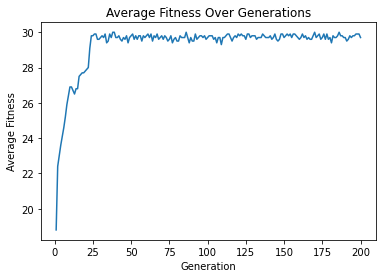

In [6]:
#plotting
plt.plot(range(1, generations + 1), average_fitness_list)
plt.title('Average Fitness Over Generations')
plt.xlabel('Generation')
plt.ylabel('Average Fitness')
plt.show()

1.2
----

In [7]:
def target_fitness(bit_string, target_bit_string):
    #count how many elements are the same
    fitness = 0
    for i in range(len(bit_string)):
        if bit_string[i] == target_bit_string[i]:
            fitness += 1
    return fitness

In [8]:
#example
pop_size = 100
bit_string_length = 30
generations = 300
mutation_rate = 0.2
target_string = generate_random_bit_string(bit_string_length)
print("target string: ", target_string)

target string:  100111010000010011111101010011


In [9]:
#create pop
pop = initialize_pop(pop_size, bit_string_length)

average_fitness_list = []

for generation in range(generations):
    new_pop = []
    #pop_size//2 becuase we are creating 2 children
    for i in range(pop_size // 2):
        #select parents
        parents = select_parents(pop)
        parent1 = parents[0]
        parent2 = parents[1]
        
        #create children
        children = crossover(parent1, parent2)
        child1 = children[0]
        child2 = children[1]
        
        #mutate children
        child1 = mutate(child1, mutation_rate)
        child2 = mutate(child2, mutation_rate)
        #add to the new pop
        new_pop.extend([child1, child2])
        
    pop = new_pop
    
    #calculate average fitness for current generation
    total_fitness = sum(target_fitness(bit_string,target_string) for bit_string in pop)
    average_fitness = total_fitness / len(pop)
    
    average_fitness_list.append(average_fitness)

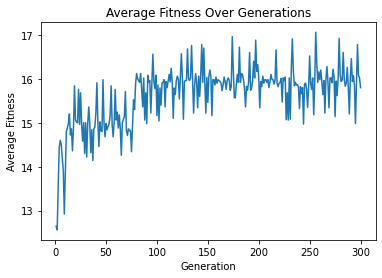

In [10]:
#plotting
plt.plot(range(1, generations + 1), average_fitness_list)
plt.title('Average Fitness Over Generations')
plt.xlabel('Generation')
plt.ylabel('Average Fitness') 
plt.show()

1.3
---

In [11]:
def desceptive_fitness(bit_string):
    #count how many ones if it contains ones
    if '1' in bit_string:
        fitness = bit_string.count('1')
    else:
        fitness = 2*len(bit_string)
    return fitness

In [12]:
#example
pop_size = 10
bit_string_length = 30
generations = 300
mutation_rate = 0.01

In [13]:
#create pop
pop = initialize_pop(pop_size, bit_string_length)

average_fitness_list = []

for generation in range(generations):
    new_pop = []
    #pop_size//2 becuase we are creating 2 children
    for i in range(pop_size // 2):
        #select parents
        parents = select_parents(pop)
        parent1 = parents[0]
        parent2 = parents[1]
        
        #create children
        children = crossover(parent1, parent2)
        child1 = children[0]
        child2 = children[1]
        
        #mutate children
        child1 = mutate(child1, mutation_rate)
        child2 = mutate(child2, mutation_rate)
        #add to the new pop
        new_pop.extend([child1, child2])
        
    pop = new_pop
    
    #calculate average fitness for current generation
    total_fitness = sum(desceptive_fitness(bit_string) for bit_string in pop)
    average_fitness = total_fitness / len(pop)
    
    average_fitness_list.append(average_fitness)

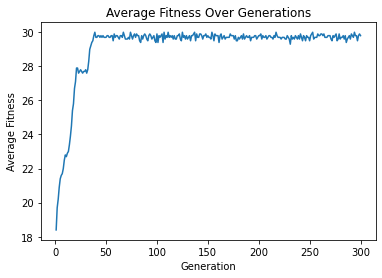

In [14]:
#plotting
plt.plot(range(1, generations + 1), average_fitness_list)
plt.title('Average Fitness Over Generations')
plt.xlabel('Generation')
plt.ylabel('Average Fitn
           ess') 
plt.show()

Part 2
---

#### This code is not finished an does not work

In [25]:
def parseInput(input_data):
    #just creates a list of the items eg, 200 3, 199 2 turns into [200,200,200,199,199]
    weights_counts = []
    items = []
    weight = 200
    for line in input_data.split('\n'):
        if line.strip():  # Ignore empty lines
            weight, count = map(int, line.split())
            weights_counts.append((weight, count))
    for weight, count in weights_counts:
        items.extend([weight] * count)
    return items

def generate_random_solution(items, bin_capacity):
    #create random solution
    return solution

def initialize_pop(pop_size, items, bin_capacity):
    #create pop
    return pop

def fitness(pop):
    #calculate wasted space so that we can minimize it
    total_wasted_space = 0
    for bin_contents in pop:
        bin_space_used = sum(bin_contents)
        wasted_space = bin_capacity - bin_space_used
        total_wasted_space += wasted_space
    return total_wasted_space  #minimize this

def selection2(pop, n):
    #implement function to choose optimal parents
    return selection
        
def crossover2(parent1, parent2):
    #implement function to perform crossover on parents
    #output the children
    return children
    
def mutation2(child, mutation_rate):
    #implement function to perform mutation
    return child

def best_fit_decreasing(items, bin_capacity):
    items.sort(reverse=True)  #sort items in decreasing order
    bins = []

    for item in items:
        best_bin_index = -1
        min_remaining_capacity = bin_capacity + 1

        #try to find the bin with the minimum remaining capacity that can fit the item
        for i, bin in enumerate(bins):
            remaining_capacity = bin_capacity - sum(bin)
            if remaining_capacity >= item and remaining_capacity < min_remaining_capacity:
                min_remaining_capacity = remaining_capacity
                best_bin_index = i

        if best_bin_index != -1:
            bins[best_bin_index].append(item)
        else:
            bins.append([item])

    return bins

def genetic_algorithm(pop_size, items, bin_capacity, generations, mutation_rate):
    pop = initialize_pop(pop_size, items, bin_capacity)
    average_fitness_list = []

    for generation in range(generations):
        new_pop = []
        for i in range(pop_size // 2):
            #select parents
            parents = selection2(pop,n)
            parent1 = parents[0]
            parent2 = parents[1]
        
            #create children
            children = crossover2(parent1, parent2)
            child1 = children[0]
            child2 = children[1]
        
            #mutate children
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)
            
            #add to the new pop
            new_pop.extend([child1, child2])
        
        pop = new_pop

        print(f"Generation {generation + 1}, Average Wasted Space: {average_fitness}")

    return pop

In [ ]:
bin_capacity = 1000
pop_size = 10
generations = 5
mutation_rate = 0.01

In [27]:
#BPP 1
input_data1 = """200 3
199 1
198 2
197 2
194 2
193 1
192 1
191 3
190 2
189 1
188 2
187 2
186 1
185 4
184 3
183 3
182 3
181 2
180 1
179 4
178 1
177 4
175 1
174 1
173 2
172 1
171 3
170 2
169 3
167 2
165 2
164 1
163 4
162 1
161 1
160 2
159 1
158 3
157 1
156 6
155 3
154 2
153 1
152 3
151 2
150 4"""

items = parseInput(input_data1)
best_solution = genetic_algorithm(items, bin_capacity, pop_size, generations, mutation_rate)
print("Soltion after {0} generations:".format(generations), best_solution)

In [ ]:
#BPP 2

input_data2 = """200 2
199 4
198 1
197 1
196 2
195 2
194 2
193 1
191 2
190 1
189 2
188 1
187 2
186 1
185 2
184 5
183 1
182 1
181 3
180 2
179 2
178 1
176 1
175 2
174 5
173 1
172 3
171 1
170 4
169 2
168 1
167 5
165 2
164 2
163 3
162 2
160 2
159 2
158 2
157 4
156 3
155 2
154 1
153 3
152 2
151 2
150 2"""

items = parseInput(input_data2)
best_solution = genetic_algorithm(items, bin_capacity, pop_size, generations, mutation_rate)
print("Soltion after {0} generations:".format(generations), best_solution)

In [29]:
#BPP 3

input_data3 = """200 1
199 2
197 2
196 2
193 3
192 2
191 2
190 2
189 3
188 1
187 1
185 3
183 2
182 1
181 3
180 3
179 3
178 1
177 5
176 2
175 5
174 4
173 1
171 3
170 1
169 2
168 5
167 1
166 4
165 2
163 1
162 2
161 2
160 3
159 2
158 2
157 1
156 3
155 3
154 1
153 2
152 3
151 2
150 1"""

items = parseInput(input_data3)
best_solution = genetic_algorithm(items, bin_capacity, pop_size, generations, mutation_rate)
print("Soltion after {0} generations:".format(generations), best_solution)

In [30]:
#BPP 4
input_data4 = """200 3
199 5
198 4
197 1
195 1
193 4
192 1
188 1
187 1
186 3
185 3
184 2
183 2
182 1
181 1
180 3
179 2
178 6
177 2
176 4
175 1
173 4
172 4
170 1
169 3
168 4
167 1
165 3
164 1
163 2
162 4
161 1
160 3
159 3
158 1
157 3
155 2
154 3
153 1
152 3
151 1
150 1"""

items = parseInput(input_data4)
best_solution = genetic_algorithm(items, bin_capacity, pop_size, generations, mutation_rate)
print("Soltion after {0} generations:".format(generations), best_solution)

In [31]:
#BPP 5
input_data5 = """200 5
199 2
198 2
197 2
196 1
195 3
194 2
193 2
192 4
191 2
190 4
188 3
187 2
186 2
185 1
184 1
183 1
182 1
181 3
180 1
178 3
177 2
176 2
174 1
173 1
172 1
171 3
168 2
167 1
165 1
164 1
163 1
162 3
161 3
160 3
159 2
158 3
157 3
156 2
155 5
154 3
153 3
151 5
150 2"""

items = parseInput(input_data5)
best_solution = genetic_algorithm(items, bin_capacity, pop_size, generations, mutation_rate)
print("Soltion after {0} generations:".format(generations), best_solution)